# Sales Analysis - 
### (After cleaned data)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv("sale_merged_file.csv")

data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,pincode,Time
0,141234,iPhone,1,700.00,2019-01-22,"944 Walnut St, Boston, MA",2215,21:25:00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28,"185 Maple St, Portland, OR",97035,14:15:00


### Order to date formate

In [3]:
data["Order Date"]=pd.to_datetime(data['Order Date'],format='%Y-%m-%d')

In [4]:
data["Total_sales"]=data["Quantity Ordered"]*data["Price Each"]

In [5]:
data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,pincode,Time,Total_sales
0,141234,iPhone,1,700.00,2019-01-22,"944 Walnut St, Boston, MA",2215,21:25:00,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28,"185 Maple St, Portland, OR",97035,14:15:00,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17,"538 Adams St, San Francisco, CA",94016,13:33:00,23.98


## Augment data with additional columns

### Add month column

In [6]:
data["months"]=data["Order Date"].dt.month

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   pincode           185950 non-null  int64         
 7   Time              185950 non-null  object        
 8   Total_sales       185950 non-null  float64       
 9   months            185950 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(3)
memory usage: 13.5+ MB


# Data Exploration!

### Question 1: What was the best month for sales? How much was earned that month?

In [8]:
grouped_data = data.groupby('months')['Total_sales'].sum().reset_index()

print(grouped_data)

    months  Total_sales
0        1   1822256.73
1        2   2202022.42
2        3   2807100.38
3        4   3390670.24
4        5   3152606.75
5        6   2577802.26
6        7   2647775.76
7        8   2244467.88
8        9   2097560.13
9       10   3736726.88
10      11   3199603.20
11      12   4613443.34


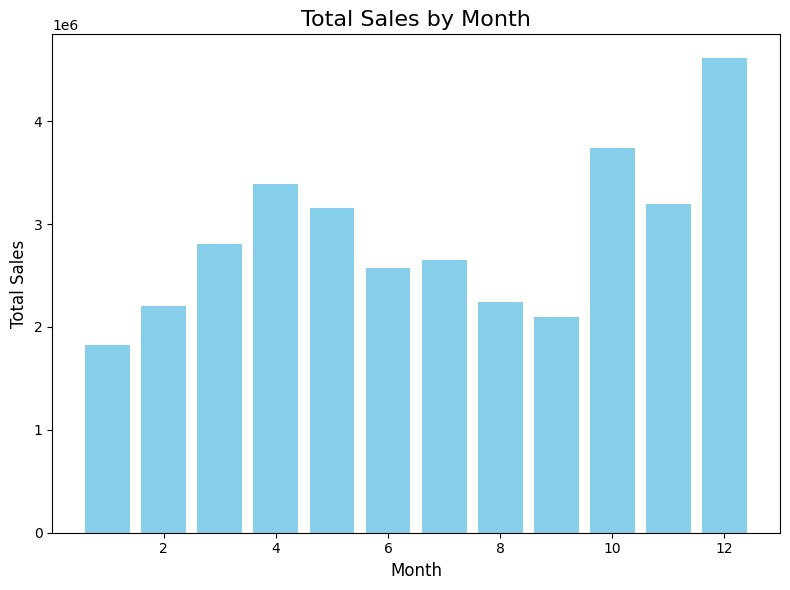

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(grouped_data['months'], grouped_data["Total_sales"], color='skyblue')

plt.title('Total Sales by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

plt.xticks()

plt.tight_layout()
plt.show()

### Add city column

In [10]:
data['City'] = data['Purchase Address'].apply(lambda x: x.split(',')[1].strip())

### Question 2: What city sold the most product?

In [11]:
city_sales = data.groupby('City')['Total_sales'].sum().reset_index()

top_5_cities = city_sales.sort_values(by='Total_sales', ascending=False).head(5)


top_5_cities

,City,Total_sales
7,San Francisco,8262203.91
4,Los Angeles,5452570.80
5,New York City,4664317.43
2,Boston,3661642.01
0,Atlanta,2795498.58


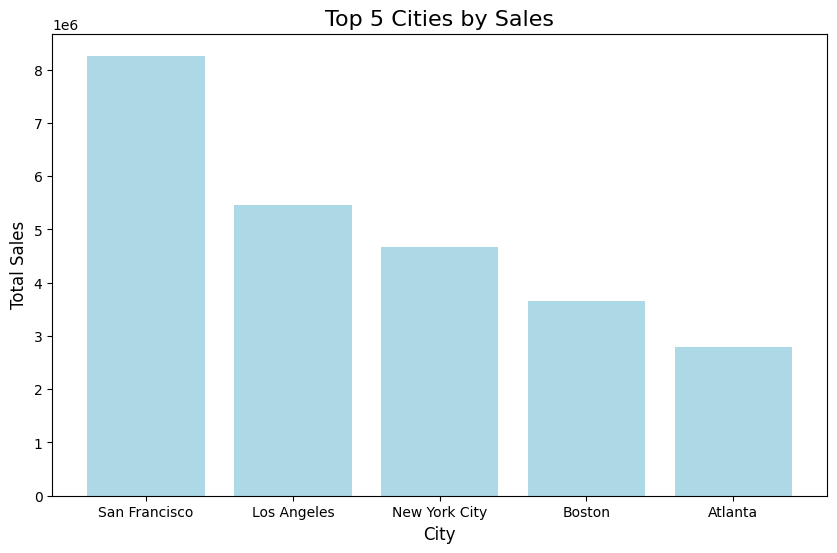

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(top_5_cities['City'], top_5_cities['Total_sales'], color='lightblue')
plt.title('Top 5 Cities by Sales', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()

## Change time data type 

### Extract hours and minuts 

In [14]:


data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')


In [15]:
data['Hour'] = data['Time'].dt.hour

In [16]:
data['minutes'] = data['Time'].dt.minute

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   pincode           185950 non-null  int64         
 7   Time              185950 non-null  datetime64[ns]
 8   Total_sales       185950 non-null  float64       
 9   months            185950 non-null  int32         
 10  City              185950 non-null  object        
 11  Hour              185950 non-null  int32         
 12  minutes           185950 non-null  int32         
dtypes: datetime64[ns](2), float64(2), int32(3), int64(3), objec

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [19]:
Time_sales = data.groupby('Hour',)['Total_sales'].sum().reset_index()

Time_sales

,Hour,Total_sales
0,0,713721.27
1,1,460866.88
2,2,234851.44
3,3,145757.89
4,4,162661.01
5,5,230679.82
6,6,448113.00
7,7,744854.12
8,8,1192348.97
9,9,1639030.58


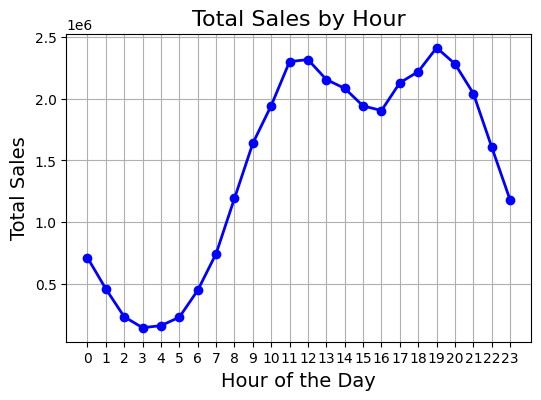

In [20]:
plt.figure(figsize=(6, 4))
plt.plot(Time_sales['Hour'], Time_sales['Total_sales'], marker='o', color='b', linestyle='-', linewidth=2)

# Adding titles and labels
plt.title('Total Sales by Hour', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

plt.xticks(range(24))
# Show gridlines
plt.grid(True)

# Display the plot
plt.show()

#### drop duplicates vealues Order Id

In [21]:
data1=data[data['Order ID'].duplicated(keep=False)]

data1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,pincode,Time,Total_sales,months,City,Hour,minutes
41,141275,USB-C Charging Cable,1,11.95,2019-01-07,"610 Walnut St, Austin, TX",73301,1900-01-01 16:06:00,11.95,1,Austin,16,6
42,141275,Wired Headphones,1,11.99,2019-01-07,"610 Walnut St, Austin, TX",73301,1900-01-01 16:06:00,11.99,1,Austin,16,6
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02,"4 1st St, Los Angeles, CA",90001,1900-01-01 08:25:00,150.00,1,Los Angeles,8,25
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02,"4 1st St, Los Angeles, CA",90001,1900-01-01 08:25:00,11.52,1,Los Angeles,8,25
133,141365,Vareebadd Phone,1,400.00,2019-01-10,"20 Dogwood St, New York City, NY",10001,1900-01-01 11:19:00,400.00,1,New York City,11,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185861,319584,Wired Headphones,1,11.99,2019-12-11,"537 Sunset St, Portland, OR",97035,1900-01-01 00:30:00,11.99,12,Portland,0,30
185873,319596,iPhone,1,700.00,2019-12-01,"436 14th St, New York City, NY",10001,1900-01-01 08:44:00,700.00,12,New York City,8,44
185874,319596,Lightning Charging Cable,1,14.95,2019-12-01,"436 14th St, New York City, NY",10001,1900-01-01 08:44:00,14.95,12,New York City,8,44
185909,319631,34in Ultrawide Monitor,1,379.99,2019-12-17,"363 Highland St, Austin, TX",73301,1900-01-01 22:35:00,379.99,12,Austin,22,35


## Grouped Products by Uniques ID 

In [22]:
data1["grouped"] = data.groupby("Order ID")["Product"].transform(lambda x: ', '.join(x))
data1=data1[['Order ID','grouped']].drop_duplicates()

data1.head(100)

C:\Users\sonu\AppData\Local\Temp\ipykernel_5352\3166095513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["grouped"] = data.groupby("Order ID")["Product"].transform(lambda x: ', '.join(x))


,Order ID,grouped
41,141275,"USB-C Charging Cable, Wired Headphones"
57,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,"Vareebadd Phone, Wired Headphones"
153,141384,"Google Phone, USB-C Charging Cable"
220,141450,"Google Phone, Bose SoundSport Headphones"
...,...,...
2195,143326,"Vareebadd Phone, USB-C Charging Cable"
2227,143357,"AAA Batteries (4-pack), 27in 4K Gaming Monitor"
2249,143378,"Bose SoundSport Headphones, AA Batteries (4-pack)"
2251,143379,"34in Ultrawide Monitor, Lightning Charging Cable"


### Question 4: What products are most often sold together?

In [23]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in data1['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


### Question 4(a):What product sold the most? Why do you think it sold the most?

In [24]:
Most_sale_product=data.groupby('Product')['Total_sales'].sum()
Most_sale_product =Most_sale_product.sort_values( ascending=False).head(10)
Most_sale_product

Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Name: Total_sales, dtype: float64

C:\Users\sonu\AppData\Local\Temp\ipykernel_5352\1344016442.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Most_sale_product.index, y=Most_sale_product.values, palette='pastel')


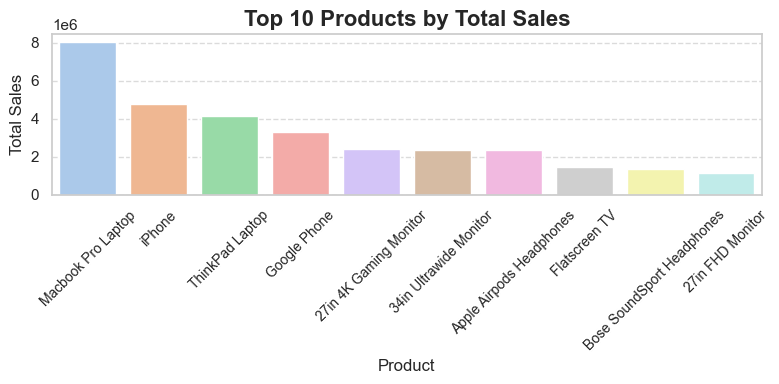

In [25]:
sns.set(style='whitegrid')

# Create a small figure size
plt.figure(figsize=(8, 4))

# Create the bar plot using Seaborn
sns.barplot(x=Most_sale_product.index, y=Most_sale_product.values, palette='pastel')

# Customize the plot
plt.title('Top 10 Products by Total Sales', fontsize=16, fontweight='bold')
plt.xlabel('Product', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

### Question 4(b):What product sold the most? Why do you think it sold the most?

In [26]:
Most_sale_product=data.groupby('Product')['Order ID'].count()
Most_sale_product =Most_sale_product.sort_values( ascending=False).head(10)

Most_sale_product

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
Name: Order ID, dtype: int64

C:\Users\sonu\AppData\Local\Temp\ipykernel_5352\3885689287.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales Count', y='Product', data=most_sale_product_df, palette='viridis')


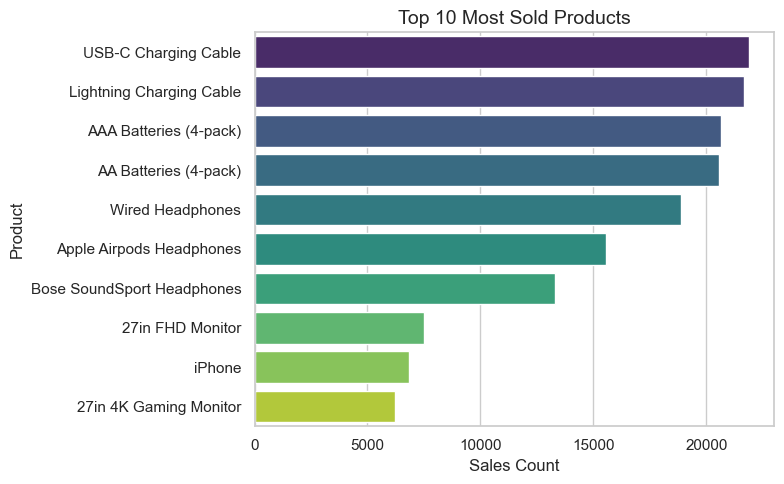

In [27]:


# Assuming Most_sale_product is a Series with product names as index
# Convert Series to DataFrame
most_sale_product_df = Most_sale_product.reset_index()
most_sale_product_df.columns = ['Product', 'Sales Count']

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a small bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Sales Count', y='Product', data=most_sale_product_df, palette='viridis')

# Adding title and labels
plt.title('Top 10 Most Sold Products', fontsize=14)
plt.xlabel('Sales Count', fontsize=12)
plt.ylabel('Product', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [28]:
data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,pincode,Time,Total_sales,months,City,Hour,minutes
0,141234,iPhone,1,700.00,2019-01-22,"944 Walnut St, Boston, MA",2215,1900-01-01 21:25:00,700.00,1,Boston,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28,"185 Maple St, Portland, OR",97035,1900-01-01 14:15:00,14.95,1,Portland,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17,"538 Adams St, San Francisco, CA",94016,1900-01-01 13:33:00,23.98,1,San Francisco,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05,"738 10th St, Los Angeles, CA",90001,1900-01-01 20:33:00,149.99,1,Los Angeles,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25,"387 10th St, Austin, TX",73301,1900-01-01 11:59:00,11.99,1,Austin,11,59
5,141239,AAA Batteries (4-pack),1,2.99,2019-01-29,"775 Willow St, San Francisco, CA",94016,1900-01-01 20:22:00,2.99,1,San Francisco,20,22
6,141240,27in 4K Gaming Monitor,1,389.99,2019-01-26,"979 Park St, Los Angeles, CA",90001,1900-01-01 12:16:00,389.99,1,Los Angeles,12,16
7,141241,USB-C Charging Cable,1,11.95,2019-01-05,"181 6th St, San Francisco, CA",94016,1900-01-01 12:04:00,11.95,1,San Francisco,12,4
8,141242,Bose SoundSport Headphones,1,99.99,2019-01-01,"867 Willow St, Los Angeles, CA",90001,1900-01-01 10:30:00,99.99,1,Los Angeles,10,30
9,141243,Apple Airpods Headphones,1,150.00,2019-01-22,"657 Johnson St, San Francisco, CA",94016,1900-01-01 21:20:00,150.00,1,San Francisco,21,20
